In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophysWhat.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37

845.34678 
845.34678 
845.34678 


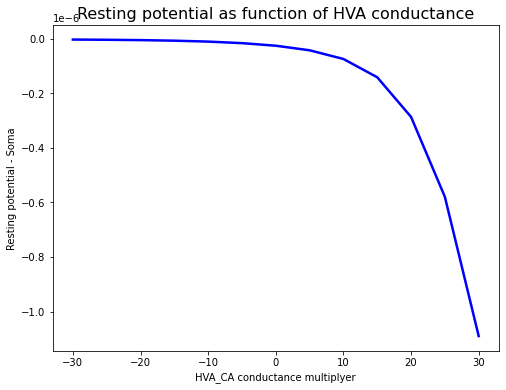

[-1.0900258344881934e-06, -5.793521365238066e-07, -2.862941136770641e-07, -1.4092664389034505e-07, -7.39135752184805e-08, -4.197836646792664e-08, -2.526782676070534e-08, -1.579164558171857e-08, -1.017544996949059e-08, -6.781259411633286e-09, -4.713510649410914e-09, -3.4494792956579223e-09, -2.6754807780754114e-09]


In [2]:
all_secs = list(L5PC.all)
x = 0
lbl = ['-30','-20','-10','0','10','20','30']
multHVA = 2
shift = 30
multList = []
restList = []
# for sec in all_secs:
#     for seg in sec:
#         #try: seg.Ih.vshift = seg.Ih.vshift -40
#         try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar*multHVA
#         except AttributeError: continue 
fig, ax = plt.subplots(figsize=(8, 6))
for i in range (0,13):
    for sec in all_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift + shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar*multHVA
            except AttributeError: continue 
    t = h.Vector().record(h._ref_t)
    som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
#     prox_v = h.Vector().record(L5PC.soma[20](0.9)._ref_v)
    nexus_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
    iHCN = h.Vector().record(L5PC.soma[0](0.5).Ih._ref_ihcn)
    iLVA = h.Vector().record(L5PC.apic[36](0.9).Ca_LVAst._ref_ica)
    v_rest = -80.28
    h.finitialize(v_rest*mV)
    h.continuerun(1000*ms)
    meanV = np.mean(list(iLVA))
    multList.append(shift)
    restList.append(meanV)
#     restList.append(float("{:.2f}".format(meanV)))
    #ax.scatter(i,meanV, i, label = lbl[x])
    #ax.set(xlim=(300,600))
    #ax.legend()
    x += 1
    for sec in all_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift - shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar/multHVA
            except AttributeError: continue 
    multHVA = multHVA - 0.1
    shift = shift - 5
ax.plot(multList,restList,'b',linewidth=2.5)
ax.set(ylabel='Resting potential - Soma', xlabel='HVA_CA conductance multiplyer')
ax.set_title('Resting potential as function of HVA conductance', fontsize=16)
plt.show()
print(restList)